# Introduction

Exploratory Data Analysis performed for a technical test.
The nature of the data is not specified.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.markers

# Data loading

We are provided with a **train set** containing the data and the target variables, from which the model will be eventually trained.
We have also a **test set** that will be used to predict the final results of the exercise.

In [2]:
X = pd.read_csv('train_data.csv')
y = pd.read_csv('train_targets.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
print(X.shape)
X.head()

(19051, 876)


id group  time dose  gen-A  gen-B  gen-C  \
0  cb509e9c-0736-11ec-bada-367dda9c2e51   exp    72    B  34.42 -29.03  18.05   
1  cb5223fc-0736-11ec-bada-367dda9c2e51   exp    48    A  44.37 -96.63 -15.40   
2  cb4eefd4-0736-11ec-bada-367dda9c2e51   exp    48    A -44.21  18.49 -56.30   
3  cb597490-0736-11ec-bada-367dda9c2e51   exp    72    B  74.55   9.17 -23.59   
4  cb54218e-0736-11ec-bada-367dda9c2e51   exp    48    B  -9.22   4.81 -28.27   

   gen-D  gen-E  gen-F  ...  cell-CM  cell-CN  cell-CO  cell-CP  cell-CQ  \
0 -25.10 -65.46  45.64  ...   24.060   49.310   -38.95   -1.680  -40.720   
1 -80.90 -63.53  51.57  ...   -3.570   18.480    -5.99   23.500   47.355   
2 -30.42  45.53  36.99  ...  -17.490   23.075    32.09    8.340   11.505   
3  64.05  -7.77  29.50  ...   58.550   45.470   -34.90  -33.865   82.400   
4  50.63   8.17  37.92  ...   36.455   62.700    10.43   36.790   26.835   

   cell-CR  cell-CS  cell-CT  cell-CU  cell-CV  
0   27.790  -33.190   29.110  -16.460    7.605  
1  -12.725   22.775   25.090   47.615   86.250  
2  -36.765  -18.080   17.290   19.605  -13.330  
3   43.045   17.040   30.080   50.950    1.190  
4    8.430   48.200    8.795   56.500   44.490  

[5 rows x 876 columns]

In [4]:
print(y.shape)
y.head()

(19051, 207)


id  mech-0  mech-1  mech-2  mech-3  \
0  cb509e9c-0736-11ec-bada-367dda9c2e51       0       0       0       0   
1  cb5223fc-0736-11ec-bada-367dda9c2e51       0       0       0       0   
2  cb4eefd4-0736-11ec-bada-367dda9c2e51       0       0       0       0   
3  cb597490-0736-11ec-bada-367dda9c2e51       0       0       0       0   
4  cb54218e-0736-11ec-bada-367dda9c2e51       0       0       0       0   

   mech-4  mech-5  mech-6  mech-7  mech-8  ...  mech-196  mech-197  mech-198  \
0       0       0       0       0       0  ...         0         0         0   
1       0       0       0       0       0  ...         0         0         0   
2       0       0       0       0       0  ...         0         0         0   
3       0       0       0       0       0  ...         0         0         0   
4       0       0       0       0       0  ...         0         0         0   

   mech-199  mech-200  mech-201  mech-202  mech-203  mech-204  mech-205  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 207 columns]

In [5]:
print(test_data.shape)
test_data.head()

(4763, 876)


id group  time dose   gen-A  gen-B  \
0  cb504122-0736-11ec-bada-367dda9c2e51   exp    48    B  -35.55  39.02   
1  cb51ae90-0736-11ec-bada-367dda9c2e51   exp    72    B  -20.93 -37.29   
2  cb5c0ffc-0736-11ec-bada-367dda9c2e51   exp    72    B   30.15 -46.63   
3  cb510f58-0736-11ec-bada-367dda9c2e51   exp    72    B   -2.49 -38.02   
4  cb528626-0736-11ec-bada-367dda9c2e51   exp    72    A  587.40 -41.65   

   gen-C   gen-D   gen-E   gen-F  ...  cell-CM  cell-CN  cell-CO  cell-CP  \
0   0.50    9.50   13.51  -28.35  ...   26.410    9.830   28.995   38.235   
1 -67.65    6.70    8.43   54.60  ...  -24.350  -36.230   19.790  -19.460   
2  13.93   -7.44  -42.17  -63.63  ...   19.665   12.625  -26.960    5.960   
3 -16.26   -8.91   29.32   28.94  ...   29.165   46.150    2.580  -25.015   
4  48.36 -122.00  111.40 -386.20  ... -497.650 -497.650 -492.900 -497.650   

   cell-CQ  cell-CR  cell-CS  cell-CT  cell-CU  cell-CV  
0   12.135   -8.380  -15.650  -13.050   30.135   22.545  
1  -42.170   19.640    6.655  -26.105   -3.935  -41.035  
2   15.725   38.105  -58.600   10.545   -4.330    8.905  
3   41.870  -36.980   38.015   -1.810   27.500   48.175  
4 -497.650 -436.050 -497.650 -417.800 -437.400 -418.850  

[5 rows x 876 columns]

# Exploratory Data Analysis

The **EDA** is an initial exploration and analysis of the data that helps us **familiarize with the nature of the dataset** and the nature of the problem at hand.
During this initial analysis we will look at factors that could affect our decision-making in the transformation of the data and the training of the model, as well as which kinds of models could be more indicated.

## Exploration of the train data

### Look for missing values

It is important to see if there are missing values among our training data, as any row with a missing value will be of no use during the training process unless the value is filled by some method.

In [6]:
X.isna().sum().max()

0

Fortunately in our case, there is **not a single missing value** in the whole dataset.

### Nature and cardinality of the variables

A usual first step when exploring the data is to discern between **categorical and numerical** variables. This can be easily done by looking at the amount of unique values for each variable, as well as identifying if those values are strings, integers or decimal numbers.
It can be easily seen from the dataframe representation above that we are going to find 3 general groups of columns:
- **id:** Which will probably be a unique identifier with no repeating values.
- **group, time and dose:** Which seem to be categorical variables, with few different values and from which **time** could be treated as numerical as well.
- **gen and cell columns:** These represent the vast majority of the variables and all of them seem to have decimal values, negative or positive.

#### id

The values of this variable seem to be composed by different segments of information, separated by a '-'.
It could be interesting to see if we can extract further value from this field by subdividing it into its single components:

In [7]:
ids = X.id.str.split('-', expand=True)
display(ids.head())
print([(f'col {col}',len(ids[col].unique())) for col in ids.columns])

0     1     2     3             4
0  cb509e9c  0736  11ec  bada  367dda9c2e51
1  cb5223fc  0736  11ec  bada  367dda9c2e51
2  cb4eefd4  0736  11ec  bada  367dda9c2e51
3  cb597490  0736  11ec  bada  367dda9c2e51
4  cb54218e  0736  11ec  bada  367dda9c2e51

[('col 0', 19051), ('col 1', 1), ('col 2', 1), ('col 3', 1), ('col 4', 1)]


We can see that only the **first segment of the data** contains useful information, while the other 4 contain only 1 single repeating value.
While this is not useful for extracting more information from the **id** variable, we can take advantage of it to make it slightly more readable suppressing all but the first segment.

Also, it could be useful to use the **id** column as index, so it is not included in any further calculations by default.

In [8]:
X.id = X.id.str.split('-', expand=True)[0]
X.set_index('id', inplace=True)
y.id = y.id.str.split('-', expand=True)[0]
y.set_index('id', inplace=True)
X.head()

group  time dose  gen-A  gen-B  gen-C  gen-D  gen-E  gen-F  gen-G  \
id                                                                           
cb509e9c   exp    72    B  34.42 -29.03  18.05 -25.10 -65.46  45.64 -10.70   
cb5223fc   exp    48    A  44.37 -96.63 -15.40 -80.90 -63.53  51.57  86.05   
cb4eefd4   exp    48    A -44.21  18.49 -56.30 -30.42  45.53  36.99  53.55   
cb597490   exp    72    B  74.55   9.17 -23.59  64.05  -7.77  29.50  18.01   
cb54218e   exp    48    B  -9.22   4.81 -28.27  50.63   8.17  37.92 -18.90   

          ...  cell-CM  cell-CN  cell-CO  cell-CP  cell-CQ  cell-CR  cell-CS  \
id        ...                                                                  
cb509e9c  ...   24.060   49.310   -38.95   -1.680  -40.720   27.790  -33.190   
cb5223fc  ...   -3.570   18.480    -5.99   23.500   47.355  -12.725   22.775   
cb4eefd4  ...  -17.490   23.075    32.09    8.340   11.505  -36.765  -18.080   
cb597490  ...   58.550   45.470   -34.90  -33.865   82.400   43.045   17.040   
cb54218e  ...   36.455   62.700    10.43   36.790   26.835    8.430   48.200   

          cell-CT  cell-CU  cell-CV  
id                                   
cb509e9c   29.110  -16.460    7.605  
cb5223fc   25.090   47.615   86.250  
cb4eefd4   17.290   19.605  -13.330  
cb597490   30.080   50.950    1.190  
cb54218e    8.795   56.500   44.490  

[5 rows x 875 columns]

#### Group, time and dose

Here we will focus on the **cardinality** of the variables, as well as trying to extract some *real world* sense for the meaning of them.

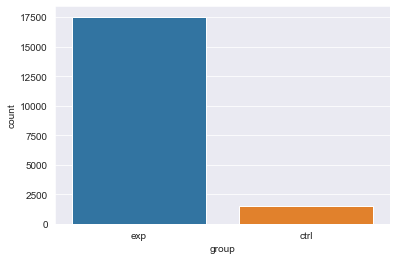

In [9]:
sns.countplot(x=X.group)
plt.show()

The **group** variable contains only 2 possible values: **exp** and **ctrl**, with an imbalanced distribution, being the **exp** value much more common than the **ctrl** value.

Knowing that the data comes from an experimental context, we can conclude that these categories mark the **experiment group** and the **control group**.
This terminology is usually employed in **randomized control trials**, which is an experimentation methodology widely used for testing the effects of treatments. In this context, the **control group** refers to a group of patients that are not given the specific treatment that is being tested.

It could be useful to keep this in mind, as it would be expected to see significant differences between the **experimental** and **control** groups in case the tested treatment is in fact creating a therapeutic effect.

From a data perspective, the **group** variable is a binary variable, that can later be transformed to a single dummy variable with values 0 or 1.

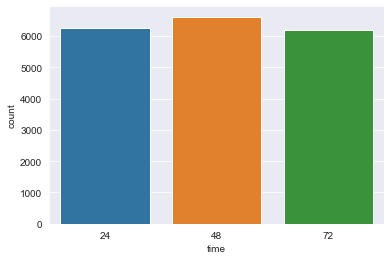

In [10]:
sns.countplot(x=X.time)
plt.show()

The **time** variable is self-explanatory. It probably indicates the time elapsed since the experiment began or since the treatment was given to each individual.

We can see **3 different values** for this variable: 24, 48 and 72. We also see that the values are more or less evenly distributed.
We can safely assume that these values are **expressed in hours**, corresponding to 1 day, 2 days and 3 days, respectively.

Although it only contains 3 different *categories*, **time** variable can be used as a **numerical variable**, since the numbers do not only represent categories, but also real numerical information.

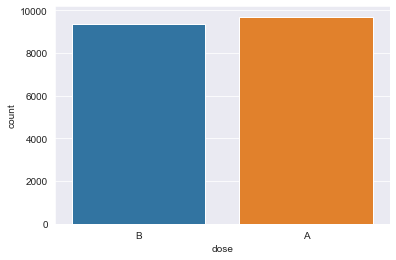

In [11]:
sns.countplot(x=X.dose)
plt.show()

The **dose** variable has 2 possible values: A and B.
Both values seem to be balanced in the dataset.

With our available information we can only speculate that **A** and **B** correspond to different amounts or *doses* given to the subjects.

The **dose** variable is a binary variable, that can later be transformed to a single dummy variable with values 0 or 1.

##### Distribution comparisons among these 'categorical' variables

It could be useful to see if some values of these categories are more related among them or if they are evenly distributed.

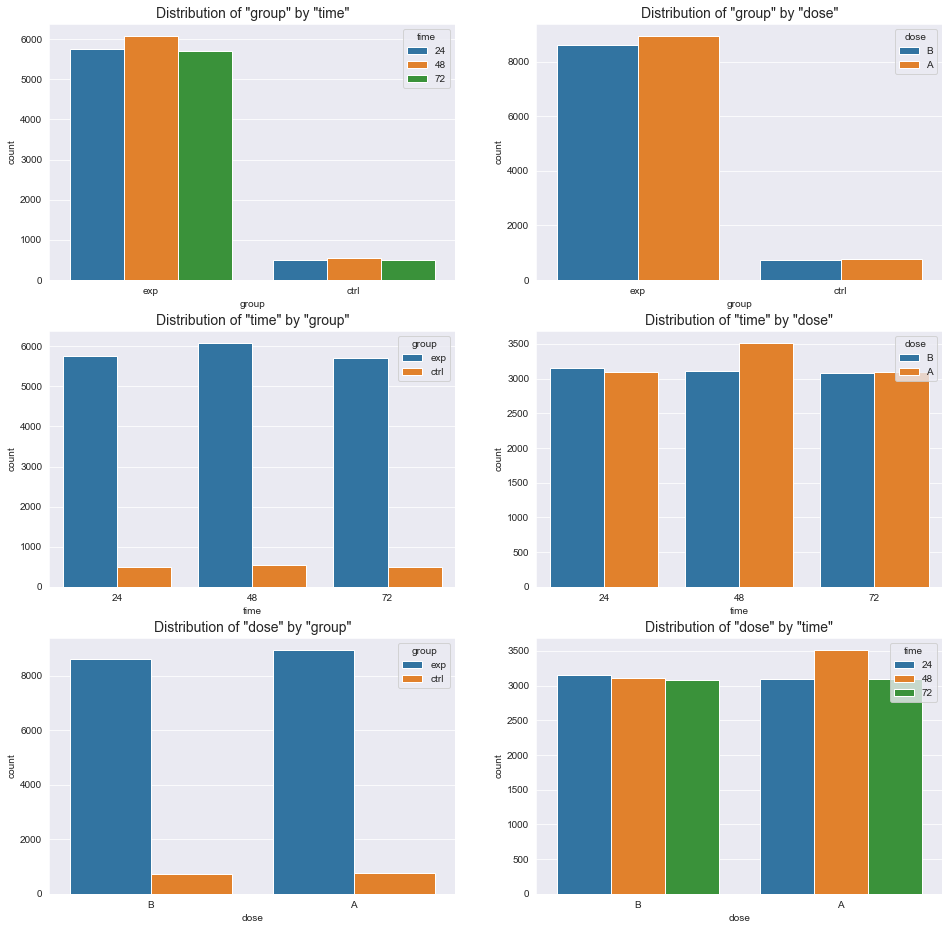

In [12]:
categorical_variables = ['group', 'time', 'dose']

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(16, 16))

for var1, ax_x in zip(categorical_variables, axes):
    other_variables = [var for var in categorical_variables if var is not var1]

    for var2, ax_y in zip(other_variables, ax_x):
        sns.countplot(data=X[categorical_variables], x=X[var1], hue=X[var2], ax=ax_y)
        ax_y.set_title(f'Distribution of "{var1}" by "{var2}"', fontsize=14)

plt.show()

Each one of these visualizations represents how a categorical variable behaves when filtered by the values of another categorical variable. If two of these categories were highly correlated, we would see a different distribution on each group of columns inside each single graph.

Since no particular pattern can be discerned, the distribution of each variable seems to be independent of the values of the other ones.

#### Gen and Cell columns

The vast majority of the data is contained among these variables, that seem to have a pattern of the words **gen** or **cell** followed by '-' and 1 or more letters.

These variables seem to be numerical, so some interesting aspects to look for would be their ranges, averages and distributions. We will pay special attention to see if any difference can be found between **gen** and **cell**.

##### Gen

In [13]:
gen_data = X.filter(regex='gen-*')
gen_data.head()

gen-A  gen-B  gen-C  gen-D  gen-E  gen-F  gen-G  gen-H  gen-I  \
id                                                                        
cb509e9c  34.42 -29.03  18.05 -25.10 -65.46  45.64 -10.70  85.90 -20.38   
cb5223fc  44.37 -96.63 -15.40 -80.90 -63.53  51.57  86.05 -10.53   9.98   
cb4eefd4 -44.21  18.49 -56.30 -30.42  45.53  36.99  53.55  14.72 -64.53   
cb597490  74.55   9.17 -23.59  64.05  -7.77  29.50  18.01  63.39 -36.76   
cb54218e  -9.22   4.81 -28.27  50.63   8.17  37.92 -18.90  96.48  13.87   

          gen-J  ...  gen-ACI  gen-ACJ  gen-ACK  gen-ACL  gen-ACM  gen-ACN  \
id               ...                                                         
cb509e9c -21.01  ...    34.38    -2.80    20.97   -89.53   -63.27  -111.40   
cb5223fc  18.37  ...   222.20   -26.47  -111.50    48.76  -171.60   -56.64   
cb4eefd4 -26.06  ...   -17.72   -44.42    14.74  -115.00   -48.16     5.54   
cb597490 -64.91  ...    17.95   -13.80   -43.96    10.10  -108.30   -46.39   
cb54218e -32.82  ...    64.00    64.38   -62.23  -105.50  -181.20     3.49   

          gen-ACO  gen-ACP  gen-ACQ  gen-ACR  
id                                            
cb509e9c   136.50    89.03   -55.11    12.42  
cb5223fc   -28.22   -41.12   -80.34   -37.23  
cb4eefd4   -10.82   -37.71   135.00    12.66  
cb597490   -10.30  -163.50    13.12   -69.84  
cb54218e   102.30   -11.03    57.89    40.96  

[5 rows x 772 columns]

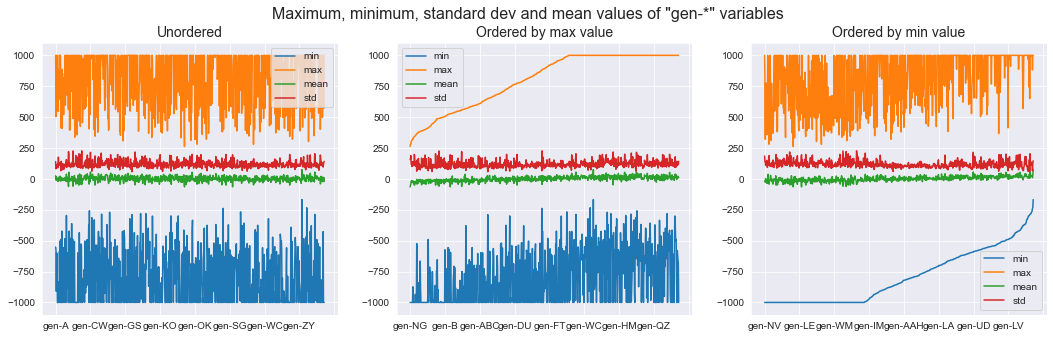

Global minimum and maximum values: -1000.0, 1000.0


In [14]:
# Create a DataFrame to store all the aggregations performed on the gen variables
gen_data_min_max = pd.DataFrame()
gen_data_min_max['min'] = gen_data.min()
gen_data_min_max['max'] = gen_data.max()
gen_data_min_max['mean'] = gen_data.mean()
gen_data_min_max['std'] = gen_data.std()

# Plot the aggregations, sorted by different methods to look for patterns
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

gen_data_min_max.plot(ax=axes[0])
gen_data_min_max.sort_values(by='max').plot(ax=axes[1])
gen_data_min_max.sort_values(by='min').plot(ax=axes[2])

fig.suptitle('Maximum, minimum, standard dev and mean values of "gen-*" variables', fontsize=16)
axes[0].set_title('Unordered', fontsize=14)
axes[1].set_title('Ordered by max value', fontsize=14)
axes[2].set_title('Ordered by min value', fontsize=14)

plt.show()

print(f'Global minimum and maximum values: {gen_data_min_max["min"].min()}, {gen_data_min_max["max"].max()}')

The first aspect that becomes apparent is that the values of these variables seem to have a **hard limit between -1000 and 1000**.

The values seem randomly distributed, with no clear relationship between the minimum and maximum values.

The average seems to be centered in 0 and the standard deviation is not high, suggesting probably a **normal distribution** for these variables.

##### Cell

In [15]:
cell_data = X.filter(regex='cell-*')
cell_data.head()

cell-A  cell-B  cell-C  cell-D  cell-E  cell-F  cell-G  cell-H  \
id                                                                         
cb509e9c -25.960  -4.860  19.155  18.595  10.790  20.425  10.180 -62.600   
cb5223fc  25.065  21.385  -1.795  34.270  21.535   1.570  39.945  12.165   
cb4eefd4  16.350   1.060  -2.060  -2.530  -5.815  16.340 -18.220  56.650   
cb597490  43.795  86.150  55.150 -36.305  -7.320  40.300  17.090  43.635   
cb54218e   0.245  31.685  24.910   3.205  70.450  -1.700   6.225  12.250   

          cell-I  cell-J  ...  cell-CM  cell-CN  cell-CO  cell-CP  cell-CQ  \
id                        ...                                                
cb509e9c -38.450  -3.280  ...   24.060   49.310   -38.95   -1.680  -40.720   
cb5223fc -42.980  10.085  ...   -3.570   18.480    -5.99   23.500   47.355   
cb4eefd4 -46.855  19.065  ...  -17.490   23.075    32.09    8.340   11.505   
cb597490  48.400 -32.835  ...   58.550   45.470   -34.90  -33.865   82.400   
cb54218e  28.470  11.885  ...   36.455   62.700    10.43   36.790   26.835   

          cell-CR  cell-CS  cell-CT  cell-CU  cell-CV  
id                                                     
cb509e9c   27.790  -33.190   29.110  -16.460    7.605  
cb5223fc  -12.725   22.775   25.090   47.615   86.250  
cb4eefd4  -36.765  -18.080   17.290   19.605  -13.330  
cb597490   43.045   17.040   30.080   50.950    1.190  
cb54218e    8.430   48.200    8.795   56.500   44.490  

[5 rows x 100 columns]

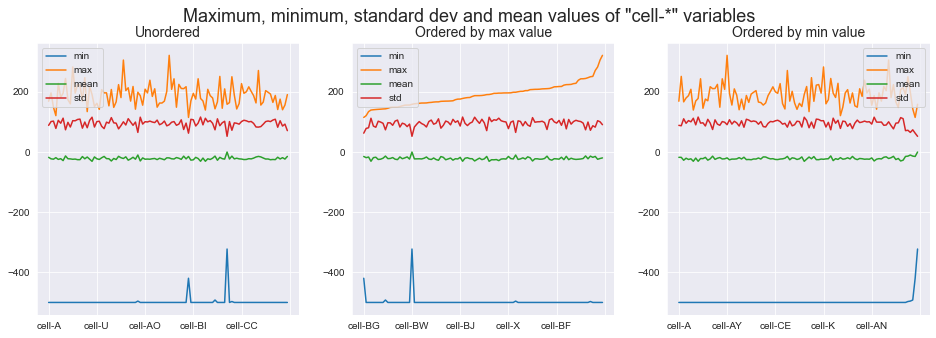

Global minimum and maximum values: -500.0, 320.6


In [16]:
# Create a DataFrame to store all the aggregations performed on the cell variables
cell_data_min_max = pd.DataFrame()
cell_data_min_max['min'] = cell_data.min()
cell_data_min_max['max'] = cell_data.max()
cell_data_min_max['mean'] = cell_data.mean()
cell_data_min_max['std'] = cell_data.std()

# Plot the aggregations, sorted by different methods to look for patterns
fig, axes = plt.subplots(ncols=3, figsize=(16, 5))

cell_data_min_max.plot(ax=axes[0])
cell_data_min_max.sort_values(by='max').plot(ax=axes[1])
cell_data_min_max.sort_values(by='min').plot(ax=axes[2])

fig.suptitle('Maximum, minimum, standard dev and mean values of "cell-*" variables', fontsize=18)
axes[0].set_title('Unordered', fontsize=14)
axes[1].set_title('Ordered by max value', fontsize=14)
axes[2].set_title('Ordered by min value', fontsize=14)

plt.show()

print(f'Global minimum and maximum values: {cell_data_min_max["min"].min()}, {cell_data_min_max["max"].max()}')

As with the previous group of variables, the **cell** variables also seem to have a **hard limit**, but this time only on the lower values, that have a **minimum of -500**.

The average is centered slightly below 0 and the standard deviation is more significant than it was with the previous case. We could be looking at a skewed normal distribution.

A couple of spikes in the minimums **could indicate outlier values**, probably causing the distribution to have a long tail to the left.

##### Comparing both of them
As both kinds of variables seem to have internal consistency, it might be a good idea to aggregate all the values of each type and visualize the resulting distributions.

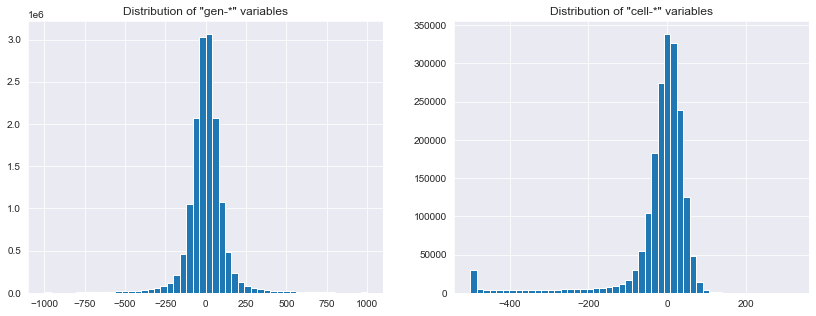

In [17]:
# Put every single value of 'gen-*' variables in a 1-dimensional array
all_gen_vars = gen_data.values.reshape(gen_data.size, 1)
# Put every single value of 'cell-*' variables in a 1-dimensional array
all_cell_vars = cell_data.values.reshape(cell_data.size, 1)

fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

axes[0].hist(all_gen_vars, bins=50)
axes[1].hist(all_cell_vars, bins=50)

axes[0].set_title('Distribution of "gen-*" variables')
axes[1].set_title('Distribution of "cell-*" variables')

plt.show()

As previous visualizations seemed to indicate, we can see that both kinds of variable are **good approximations of normal distributions**, with the **gen** variables completely centered on 0 and the **cell** variables showing some **outliers on the leftmost side**.

We can also conclude from this section that there are fundamental differences between the **gen** and the **cell** variables, with differences on values limit and on ranges.

It will probably be a good idea to rescale all these variables before the model is trained, to avoid biasing results due to these numerical differences.

It can also be interesting to see how all these numerical values **roughly correlate** with each other. There are far so many variables to do an exhaustive analysis, but a **big picture view** could help us detect some patterns.

In [18]:
gen_cell_data = X.filter(regex='gen-*|cell-*')
corr_gen_cell = gen_cell_data.corr()

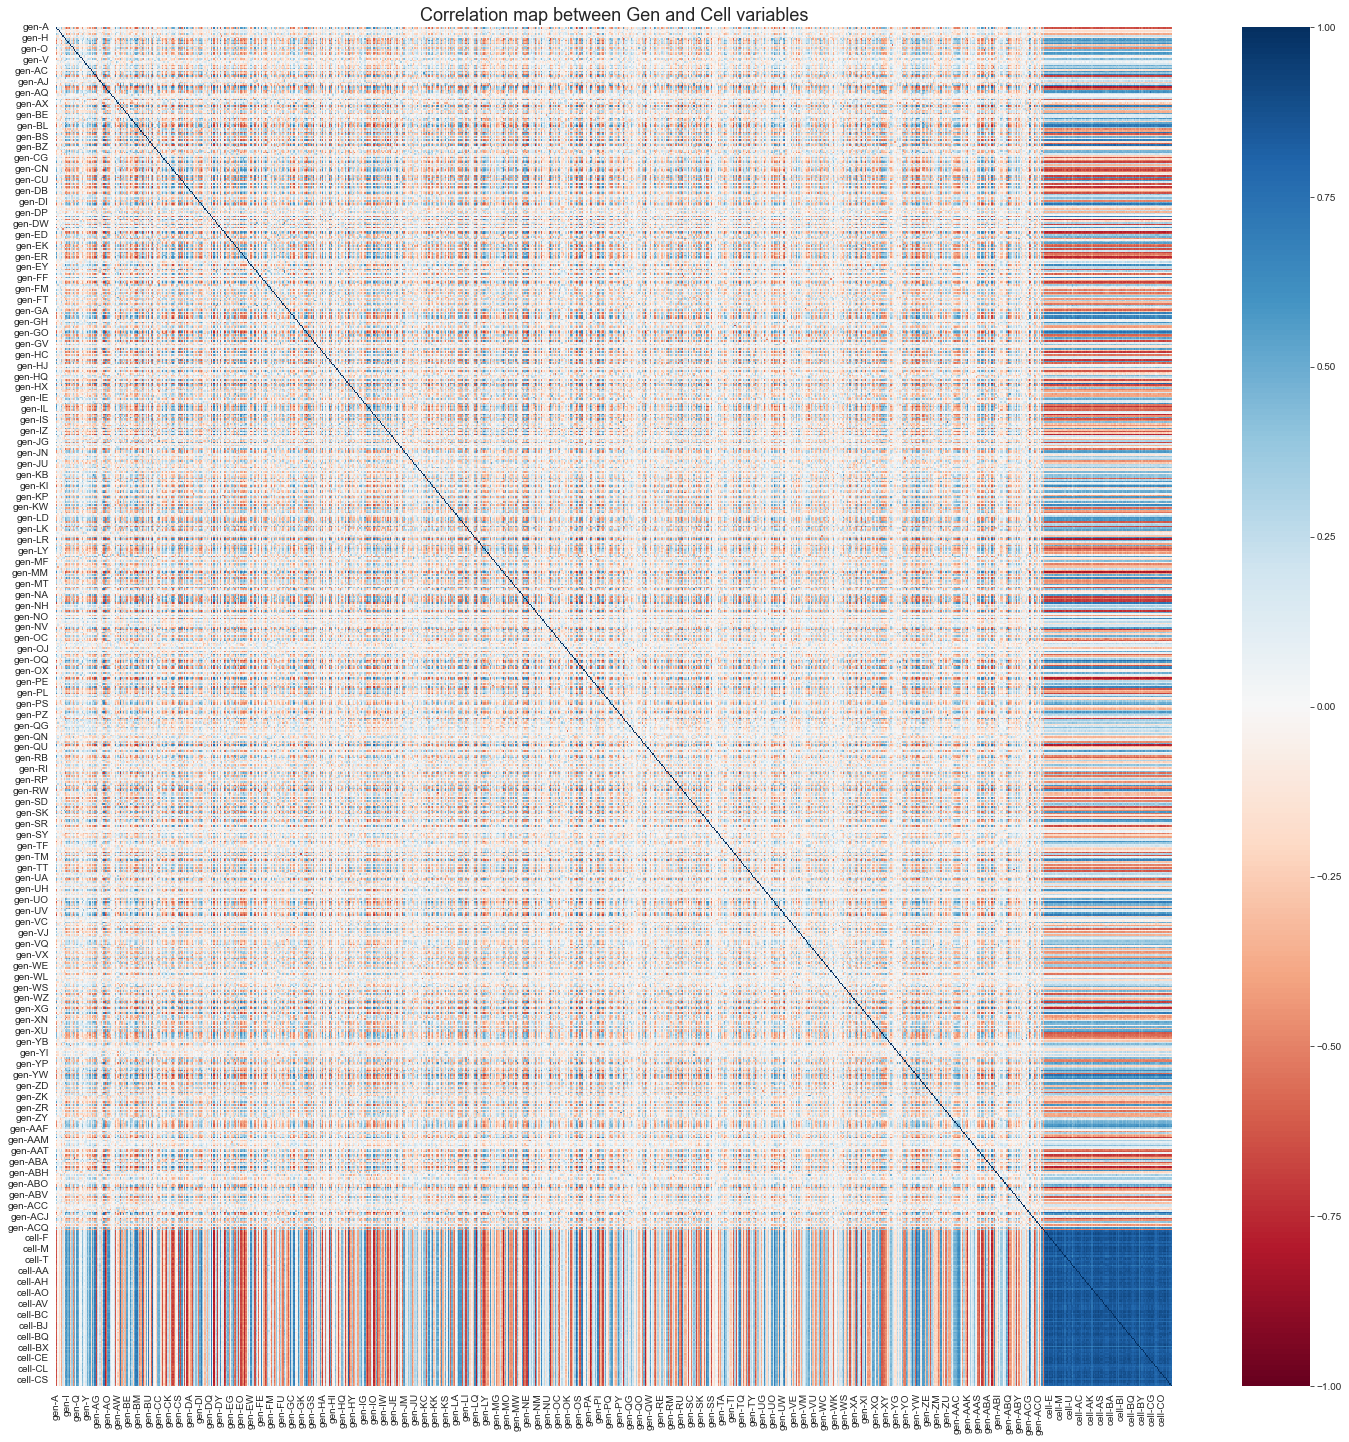

In [19]:
fig = plt.figure(figsize=(25, 25))
sns.heatmap(corr_gen_cell, vmin=-1, vmax=1, cmap='RdBu')
plt.title('Correlation map between Gen and Cell variables', fontsize=18)
plt.show()

The **correlation heatmap** above clearly shows us **3 distinct areas**:
- Correlation between the **gen** variables can be seen as the **big upper-left** area that occupies most of the heatmap. In this area, values seem to be mostly chaotic, with positive and negative values all over the place, as well as big chunks of no correlation at all.
- Correlation between the **cell** variables can be seen in the small blueish square on the **bottom-right** area, and it is much more interesting. There we can see that **cell** variables have a strong positive correlation among them. This could mean an opportunity to apply some dimensionality reduction mechanism, since there could be some multicollinearity, which means that the information provided by some of these variables can probably explain the rest of them.
- Lastly, when comparing **gen** to **cell** variables, there also seems to be a pattern. The group of vertical lines on the **bottom of the heatmap** indicates that once a **gen** variable has a certain correlation with a **cell** variable, it is likely that the **gen** variable will have the same correlation with most of the other **cell** variables. This is probably confirming the suspicion from the previous point that all **cell** variables have some multicollinearity.

### Cross comparison: Categorical and Numerical

The vast amount of numerical variables makes virtually impossible to do a thorough exploration on how they all behave for each value of the categorical variables. However, since both groups of numerical variables seem to **adhere mostly to normal distributions**, it is probably safe to summarize them using an **arithmetic average**, just for comparison purposes.

This way, we can observe how the averaged numerical variables behave for each value of the categorical ones.

In [20]:
avg_gen_data = gen_data.mean(axis=1)
avg_cell_data = cell_data.mean(axis=1)

In [21]:
# Summarizing in a single DataFrame all the variables, with numerical ones averaged
avg_gen_cell = pd.concat([X[categorical_variables], avg_gen_data, avg_cell_data], axis=1)
avg_gen_cell.columns = categorical_variables + ['gen_avg', 'cell_avg']
avg_gen_cell.head()

group  time dose    gen_avg  cell_avg
id                                            
cb509e9c   exp    72    B   2.663575   3.76665
cb5223fc   exp    48    A   1.690984  15.58545
cb4eefd4   exp    48    A   1.359067   2.62755
cb597490   exp    72    B   3.369275  29.43530
cb54218e   exp    48    B  24.557422  23.85605

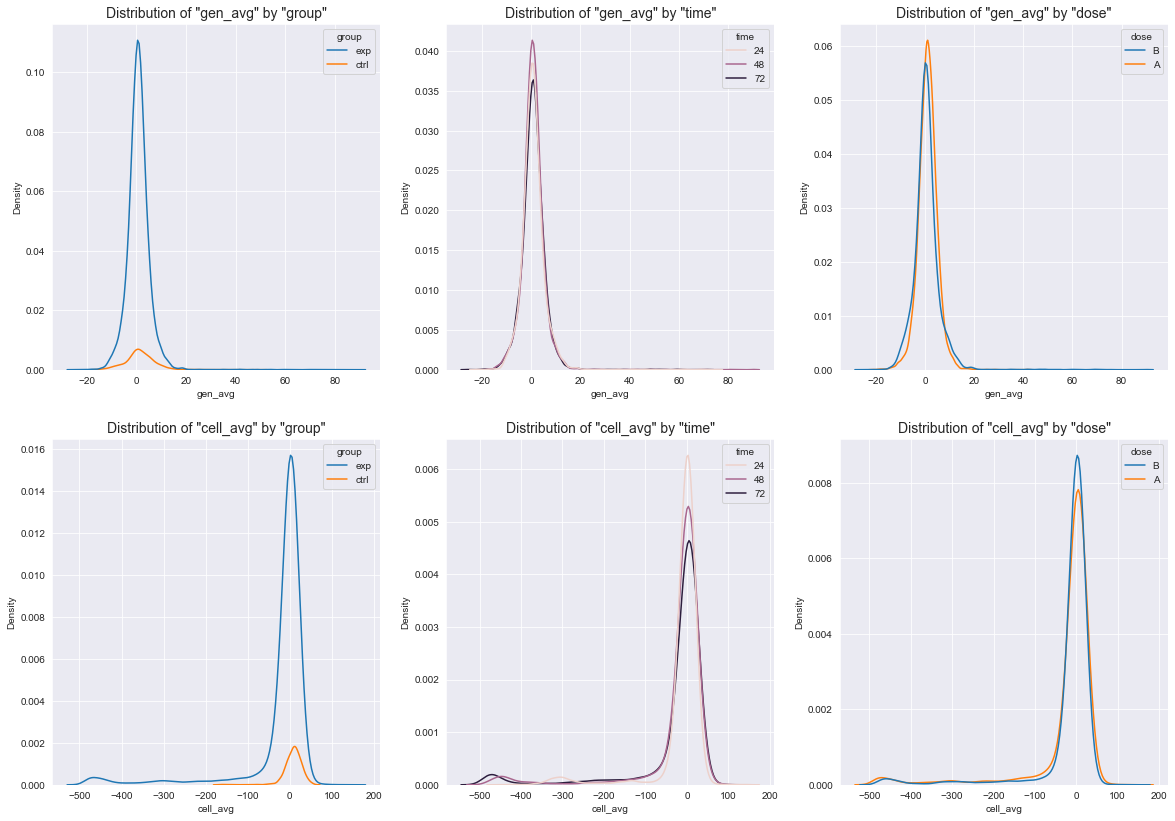

In [22]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 14))

for var1, ax_x in zip(['gen_avg', 'cell_avg'], axes):
    for var2, ax_y in zip(categorical_variables, ax_x):
        sns.kdeplot(data=avg_gen_cell, x=var1, hue=var2, ax=ax_y)
        ax_y.set_title(f'Distribution of "{var1}" by "{var2}"', fontsize=14)

plt.show()

If some category were highly correlated with some numerical variable, we would expect to see some **bimodality**, where the density function of the numerical variables would be skewed to one side or the other depending on the value of the category.

This effect is not clearly observed here, which probably mean that the **numerical and categorical variables are mostly independent** between them.

## Exploration of the target data

### Multiple classification problem

As we can see in the train targets, we are dealing with a multiple classification problem in which the first logical step is to see how many classes are there.

In [23]:
print(f'Number of classes is: {len(y.columns)}')

Number of classes is: 206


### Multiclass or multilabel?

A multiclass classification problem has only 1 class for each sample, while a multilabel classification problem can assign 1 or more classes to each sample.

Here we can see how many labels are assigned as maximum and minimum to a single sample:

In [24]:
labels_per_sample = y.sum(axis=1).sort_values()
print(f'Minimum and maximum labels per sample: {labels_per_sample.min()}, {labels_per_sample.max()}')

Minimum and maximum labels per sample: 0, 7


We can see that there are up to 7 labels assigned to a single sample, and some of them have also 0 labels. Let's see how common are these different situations.

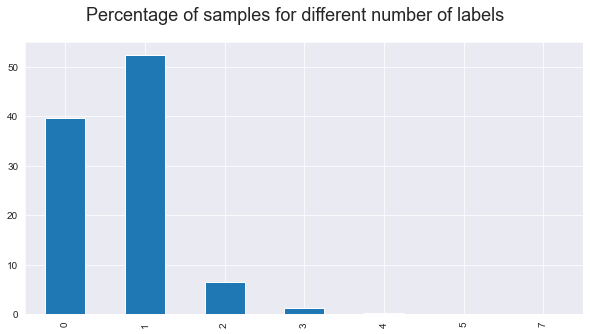

0        1        2       3      4     5     7
frequency   7558.00  9956.00  1243.00  234.00  45.00  9.00  6.00
percentage    39.67    52.26     6.52    1.23   0.24  0.05  0.03

In [25]:
grouped_labels_per_sample = pd.DataFrame(labels_per_sample.groupby(labels_per_sample).count(), columns=['frequency'])
grouped_labels_per_sample['percentage'] = \
    (grouped_labels_per_sample.frequency*100/grouped_labels_per_sample.frequency.sum()).round(2)

fig = plt.figure(figsize=(10, 5))
grouped_labels_per_sample.percentage.plot.bar()
fig.suptitle('Percentage of samples for different number of labels', fontsize=18)
plt.show()

display(grouped_labels_per_sample.T)

As we can see, the most common case (>50%) is that each sample is assigned to 1 single label, but there are also plenty of cases in which a sample isn't assigned to any label.
Less than 10% of cases have more than 1 label. While these results are not very common, we need to assess that the problem at hand is a **multilabel classification** problem, rather than a multiclass one.

### How balanced is the dataset?

This is a crucial aspect of any classification problem, since underrepresented classes tend to be more difficult to predict.

In [26]:
classes_distribution = y.sum(axis=0)
classes_pct = classes_distribution * 100 / classes_distribution.sum()
classes_pct.head()

mech-0    0.096935
mech-1    0.119305
mech-2    0.149131
mech-3    1.118485
mech-4    1.789576
dtype: float64

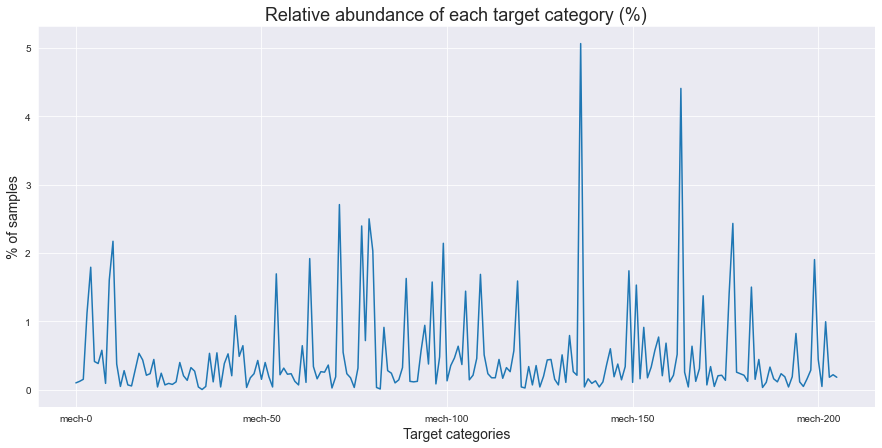

Minimum and maximum percentage for target categories: 0.0%, 5.06%


In [27]:
fig, ax = plt.subplots(figsize=(15, 7))
classes_pct.plot(ax=ax)
ax.set_ylabel('% of samples', fontsize=14)
ax.set_xlabel('Target categories', fontsize=14)

plt.title('Relative abundance of each target category (%)', fontsize=18)
plt.show()

print(f'Minimum and maximum percentage for target categories: {round(classes_pct.min(),2)}%, {round(classes_pct.max(),2)}%')

The line above shows a **highly imbalanced dataset** in which some categories are much better represented than others. We can see that there are even categories with **no presence at all**.

Let's see how many target categories have no representation at all.

In [28]:
sum_0_filt = y.sum() == 0
zero_categories = y.columns[sum_0_filt].values

print(len(zero_categories))
print(zero_categories)

1
['mech-34']


Only 1 class, **mech-34** has no representation at all in the dataset.

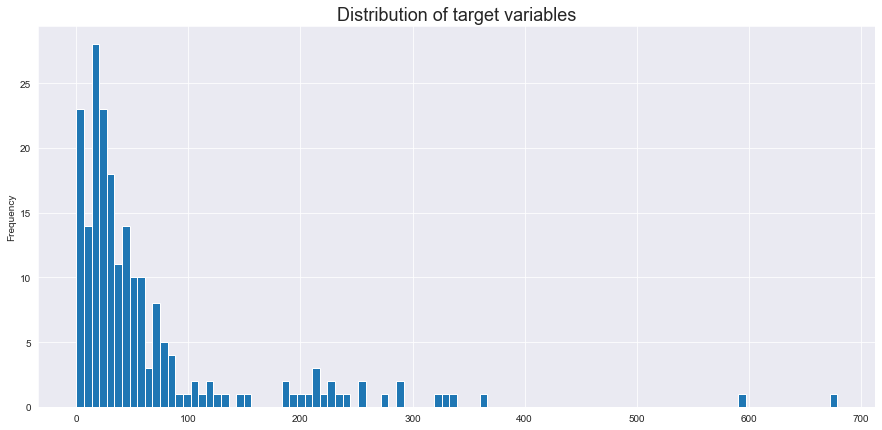

Minimum and maximum number of values for target variables: 0, 679


In [29]:
fig, ax = plt.subplots(figsize=(15, 7))
classes_distribution.plot(kind='hist', bins=100, ax=ax)
ax.set_title('Distribution of target variables', fontsize=18)
plt.show()

print(f'Minimum and maximum number of values for target variables: {classes_distribution.min()}, {classes_distribution.max()}')

The X axis of this histogram shows the **number of positive values**, while the Y axis shows the **number of classes** with this amount of positive values.

We can see that most of the classes have **under 100 positive values**, although a small amount of them can reach much higher, **up to 679**.

### Correlation plot
Now we'll see if there is any significant correlation pattern among the target classes.

In [30]:
corr_y = y.corr()

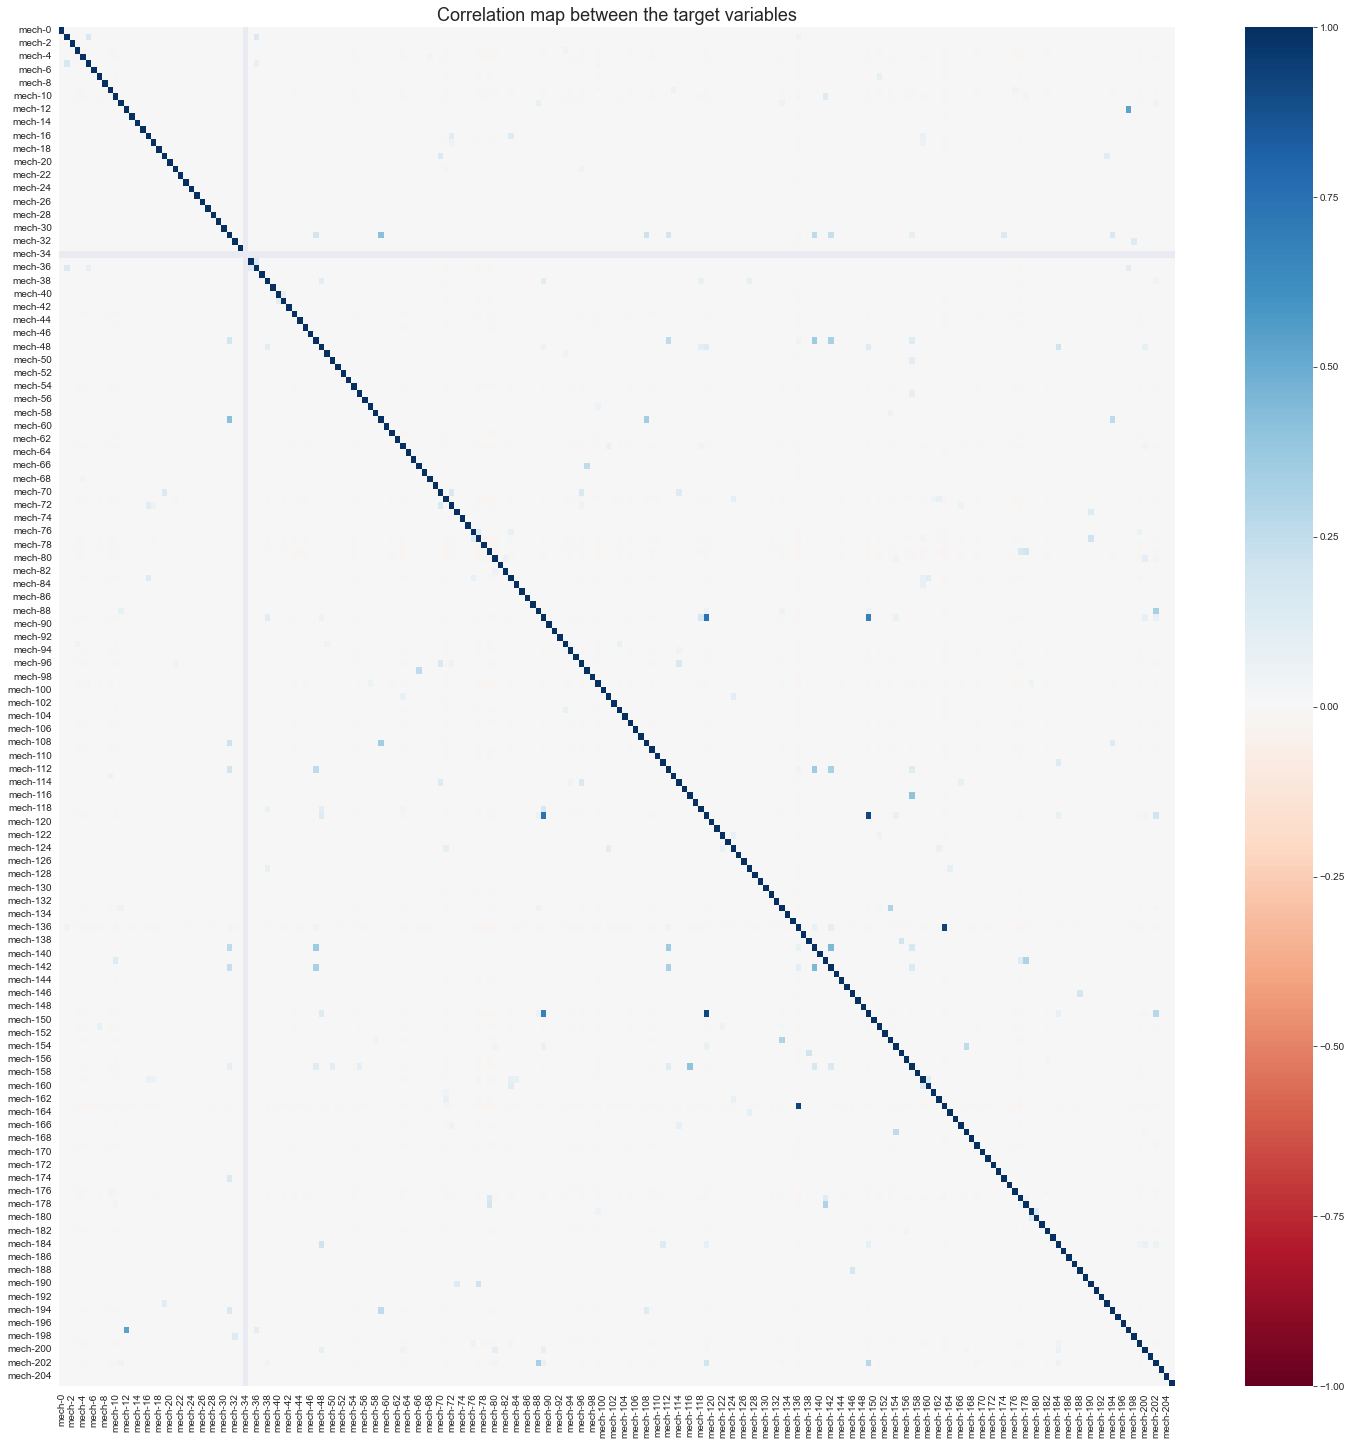

In [31]:
fig = plt.figure(figsize=(25, 25))
sns.heatmap(corr_y, vmin=-1, vmax=1, cmap='RdBu')
plt.title('Correlation map between the target variables', fontsize=18)
plt.show()

As expected with such a **sparse dataset**, there are almost no correlation values between the different categories.

At the heatmap we can also observe the line of the **mech-34** variable, which has no correlation to show, as it has no values.

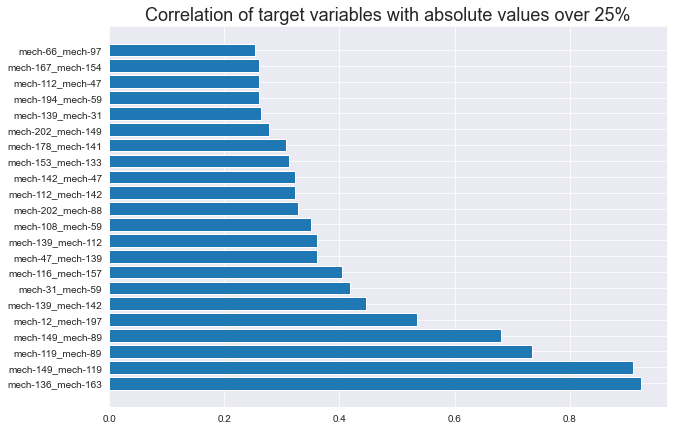

In [32]:
top_corr_y = corr_y.unstack() # Put all the correlations pairs in one column
top_corr_y = top_corr_y.sort_values(ascending=False) # Sort values decreasing
top_corr_y = top_corr_y.iloc[len(y.columns):] # Skip values correlating with themselves
top_corr_y = top_corr_y.iloc[::2] # Every other row is the same correlation as the previous one, reversed
top_corr_y = top_corr_y[abs(top_corr_y) > 0.25] # Pick only pairs with absolute correlation over 25%

fig = plt.figure(figsize=(10, 7))
plt.barh(y=top_corr_y.index.map('_'.join), width=top_corr_y.values)
plt.title('Correlation of target variables with absolute values over 25%', fontsize=18)

plt.show()

With the transformations and filter above, we can see that there are **21 pairs of target variables with a correlation value over 25%**. It is difficult to say if this is a true effect or just random chance due to the big amount of variables.

Which is maybe more interesting is that **no single pair of target variables** have a significant negative correlation.

## Cross exploration of train and target data

As a final step on this exploratory analysis, we will try to look for interesting patterns of the **target data when crossed with the training data**. This will be challenging, especially because we didn't find a satisfactory method for aggregating the target variables.

### Gen and target variables

In [33]:
gen_y_corr = pd.DataFrame(index=gen_data.columns)
for col in y.columns:
    gen_y_corr[col] = gen_data.corrwith(y[col], axis=0)
    gen_y_corr = gen_y_corr.copy()

gen_y_corr.head()

mech-0    mech-1    mech-2    mech-3    mech-4    mech-5    mech-6  \
gen-A -0.009738 -0.011291  0.002934 -0.020504 -0.034741 -0.008809 -0.021016   
gen-B -0.003042 -0.006777 -0.000372 -0.009732  0.006388  0.011469 -0.006267   
gen-C -0.000842  0.000365 -0.007180 -0.005198 -0.018407  0.002198 -0.003926   
gen-D -0.007519 -0.000444  0.002226 -0.006588 -0.007389 -0.012145 -0.003185   
gen-E -0.007096  0.003004  0.012540 -0.009391 -0.014736 -0.009981 -0.009744   

         mech-7    mech-8    mech-9  ...  mech-196  mech-197  mech-198  \
gen-A -0.010561 -0.010132 -0.032015  ... -0.006216 -0.005087 -0.006873   
gen-B  0.005836 -0.001831  0.010388  ... -0.006247  0.010444  0.002857   
gen-C -0.008584  0.003727 -0.005895  ...  0.006859  0.005490  0.008703   
gen-D  0.001374  0.007855 -0.011144  ...  0.016200 -0.011086 -0.018520   
gen-E -0.001412 -0.005069 -0.008176  ... -0.000374  0.000176 -0.005761   

       mech-199  mech-200  mech-201  mech-202  mech-203  mech-204  mech-205  
gen-A -0.035416 -0.010386 -0.006560  0.010549 -0.008676 -0.004940 -0.008032  
gen-B -0.007999 -0.001348 -0.003153 -0.011375  0.002618  0.001489  0.002346  
gen-C  0.001405  0.015253  0.003909 -0.008386 -0.004379  0.019450  0.006120  
gen-D -0.004017  0.000193 -0.000989  0.001444 -0.000251 -0.005542  0.002178  
gen-E -0.017986 -0.002270  0.000034 -0.008731  0.005009 -0.005177  0.001620  

[5 rows x 206 columns]

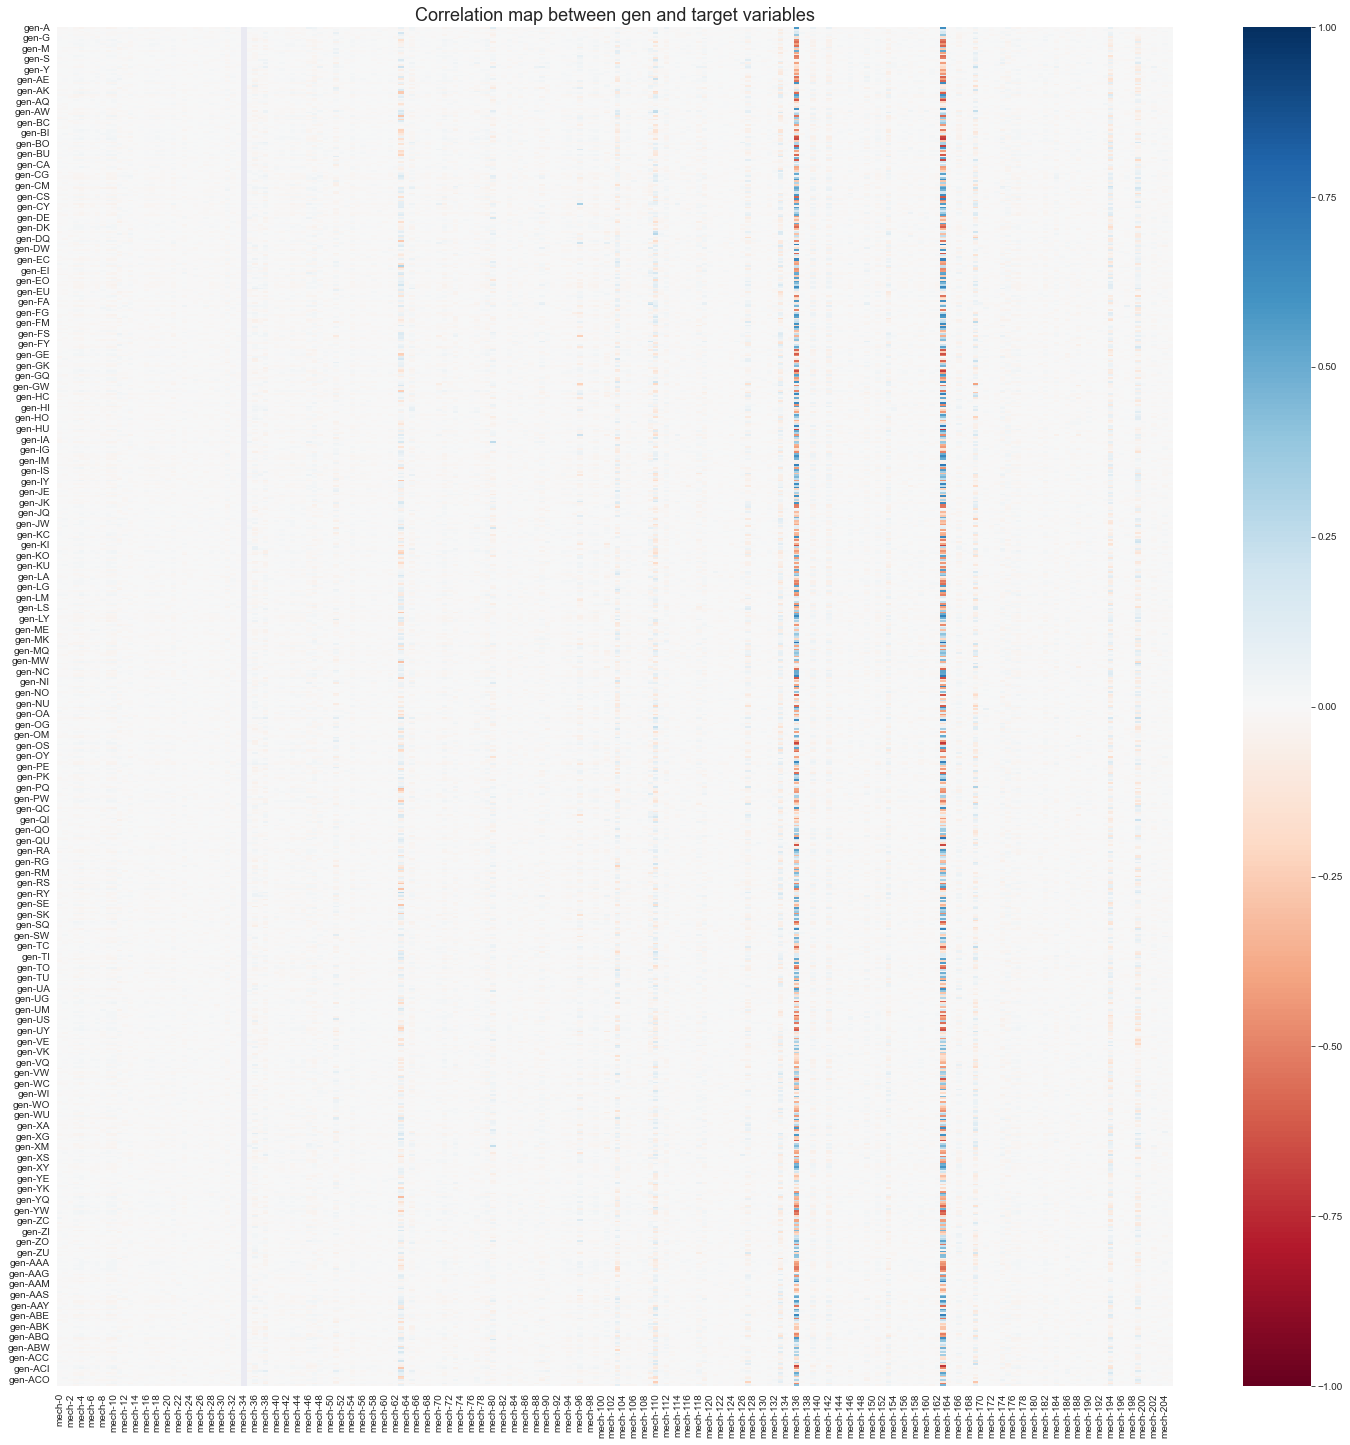

In [34]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(gen_y_corr, ax=ax, cmap='RdBu', vmin=-1, vmax=1)
ax.set_title('Correlation map between gen and target variables', fontsize=18)

plt.show()

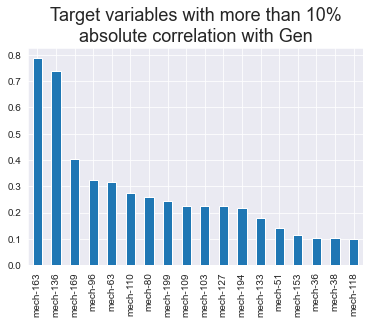

Number of variables with more than 10% absolute correlation: 18


In [35]:
gen_y_corr_max = gen_y_corr.abs().max()
gen_y_corr_max[gen_y_corr_max > 0.1].sort_values(ascending=False).plot(kind='bar')
plt.title('Target variables with more than 10%\nabsolute correlation with Gen', fontsize=18)
plt.show()

print(f'Number of variables with more than 10% absolute correlation: {len(gen_y_corr_max[gen_y_corr_max > 0.1])}')

From the heatmap and the bar chart above we can see that most of the **gen** variables are probably going to be useful to predict the values of some targets.

### Cell and target variables

In [36]:
cell_y_corr = pd.DataFrame(index=cell_data.columns)
for col in y.columns:
    cell_y_corr[col] = cell_data.corrwith(y[col], axis=0)
    cell_y_corr = cell_y_corr.copy()

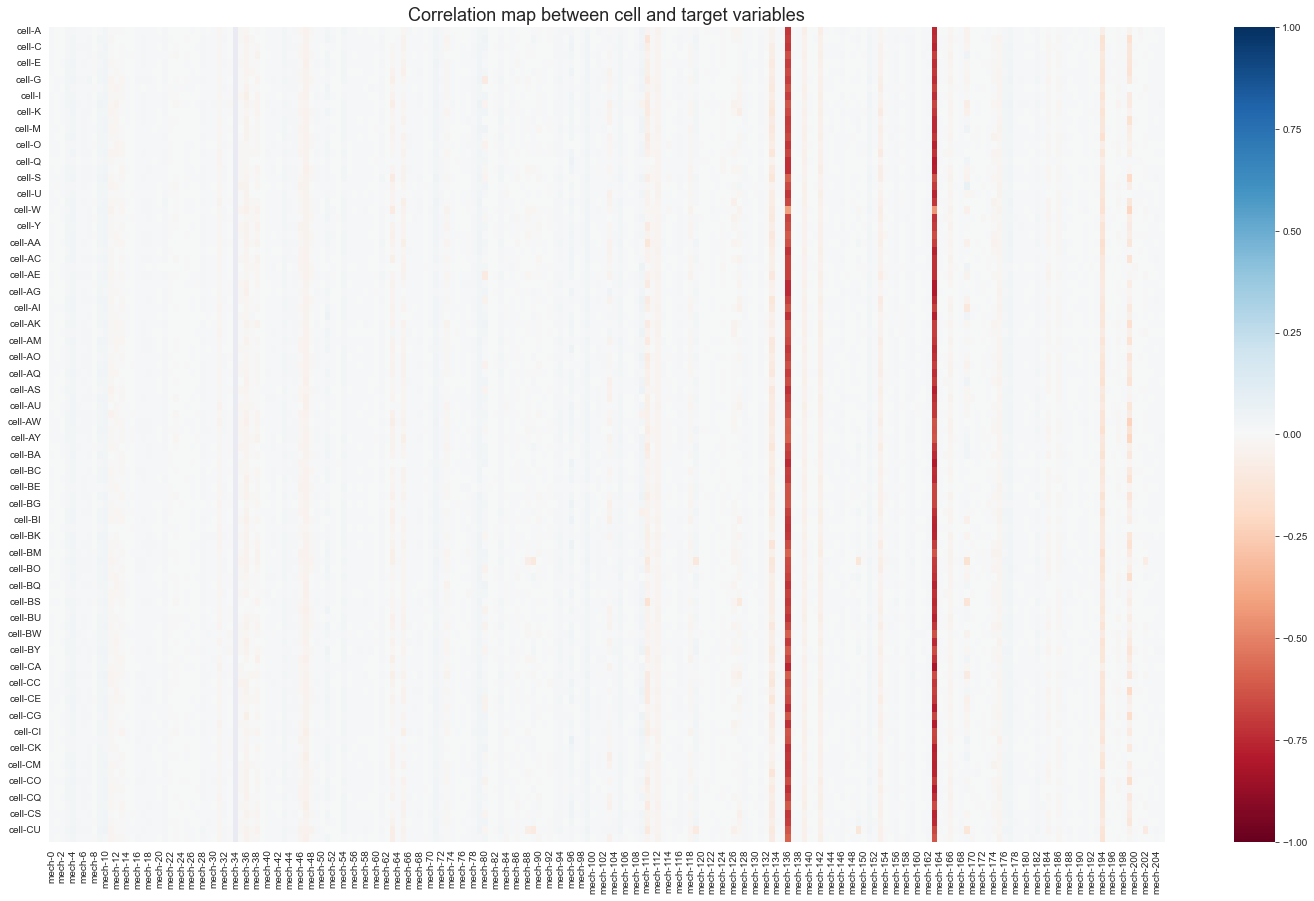

In [37]:
cell_y_corr.head()
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(cell_y_corr, ax=ax, cmap='RdBu', vmin=-1, vmax=1)
ax.set_title('Correlation map between cell and target variables', fontsize=18)

plt.show()

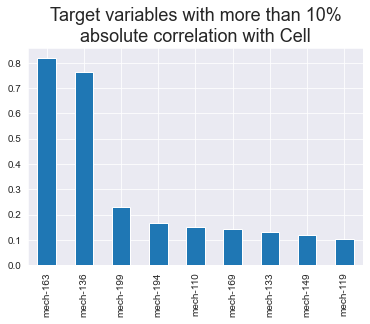

Number of variables with more than 10% absolute correlation: 9


In [38]:
cell_y_corr_max = cell_y_corr.abs().max()
cell_y_corr_max[cell_y_corr_max > 0.1].sort_values(ascending=False).plot(kind='bar')
plt.title('Target variables with more than 10%\nabsolute correlation with Cell', fontsize=18)
plt.show()

print(f'Number of variables with more than 10% absolute correlation: {len(cell_y_corr_max[cell_y_corr_max > 0.1])}')

As we saw before, here we can confirm that most **cell** variables have similar meaning.

### Categorical and target variables

In [39]:
categorical_data = X[['time']]
dummies_group = pd.get_dummies(X['group'], drop_first=True, prefix='group')
dummies_dose = pd.get_dummies(X['dose'], drop_first=True, prefix='dose')
categorical_data= pd.concat([categorical_data, dummies_group, dummies_dose], axis=1)

categorical_y_corr = pd.DataFrame(index=categorical_data.columns)
for col in y.columns:
    categorical_y_corr[col] = categorical_data.corrwith(y[col], axis=0)
    categorical_y_corr = categorical_y_corr.copy()

categorical_y_corr.head()

mech-0    mech-1    mech-2    mech-3    mech-4    mech-5  \
time      -0.004860 -0.002115  0.002149 -0.004017  0.001082  0.000238   
group_exp  0.007681  0.008522  0.009529  0.026185  0.033200  0.015816   
dose_B     0.006518  0.000540  0.000604 -0.000716  0.002105  0.001981   

             mech-6    mech-7    mech-8    mech-9  ...  mech-196  mech-197  \
time      -0.001028 -0.002791  0.000111 -0.006294  ...  0.000078  0.000147   
group_exp  0.015228  0.018724  0.007379  0.031403  ...  0.005217  0.009764   
dose_B    -0.002083  0.000360  0.000468  0.001494  ...  0.000331 -0.004127   

           mech-198  mech-199  mech-200  mech-201  mech-202  mech-203  \
time      -0.004171 -0.000051 -0.002092  0.000078  0.003492 -0.003506   
group_exp  0.013140  0.034236  0.016383  0.005217  0.024645  0.010439   
dose_B    -0.001520 -0.000113 -0.001796  0.000331 -0.000329  0.000662   

           mech-204  mech-205  
time       0.001839  0.000157  
group_exp  0.011477  0.010439  
dose_B    -0.000619  0.000662  

[3 rows x 206 columns]

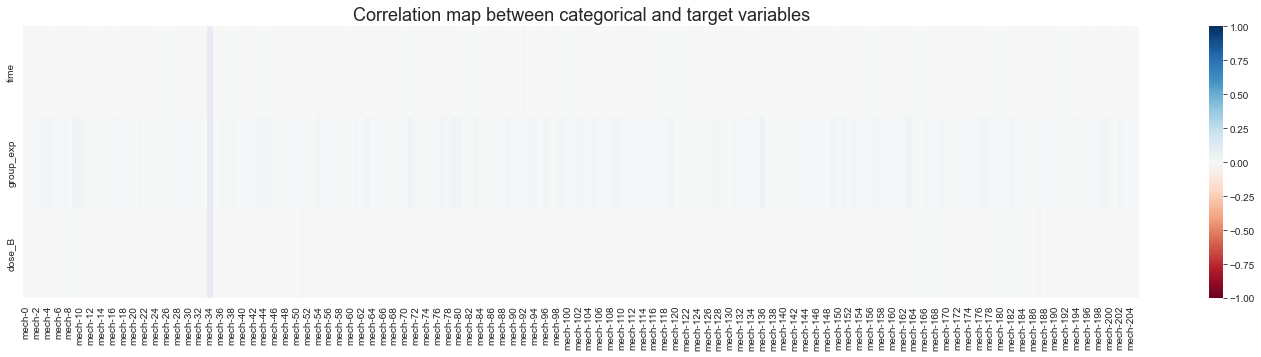

In [40]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.heatmap(categorical_y_corr, ax=ax, cmap='RdBu', vmin=-1, vmax=1)
ax.set_title('Correlation map between categorical and target variables', fontsize=18)

plt.show()

In [41]:
categorical_y_corr_max = categorical_y_corr.abs().max()
print(f'Number of variables with more than 10% absolute correlation: {len(categorical_y_corr_max[categorical_y_corr_max > 0.1])}')

Number of variables with more than 10% absolute correlation: 0


It seems that **categorical variables** are not highly correlated with any **target** value.

### More predictable categories
From this last section of analysis, we can interpret which target categories are going to be **easier to predict**, based on their correlation values with the training data.

In [42]:
correlated_targets = list(
    set(gen_y_corr_max[gen_y_corr_max > 0.1].index.tolist() +
        cell_y_corr_max[cell_y_corr_max > 0.1].index.tolist())
)

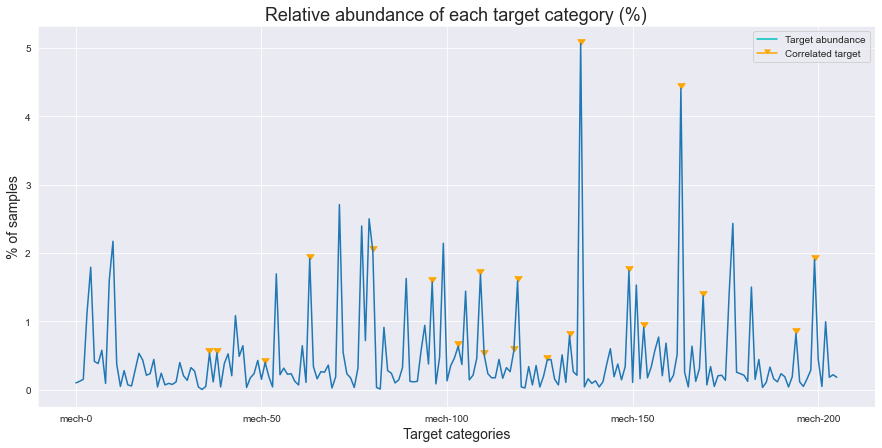

In [43]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(15, 7))
classes_pct.plot(ax=ax)
ax.set_ylabel('% of samples', fontsize=14)
ax.set_xlabel('Target categories', fontsize=14)

plt.title('Relative abundance of each target category (%)', fontsize=18)

# Mark categories identified as correlated with training variables
for i in range(len(y.columns)):
    if y.columns[i] in correlated_targets:
        ax.scatter(i, classes_pct.iloc[i], s=50, color='orange',
                   marker=matplotlib.markers.CARETDOWN)

legend_elements = [
    Line2D([0], [0], label='Target abundance', color='c'),
    Line2D([0], [0], label='Correlated target',
           marker=matplotlib.markers.CARETDOWN, color='orange')
]
ax.legend(handles=legend_elements)

plt.show()

Surprisingly, some targets identified as highly correlated have a relatively low abundance of values, while some of the most abundant didn't show a high correlation.

## Preliminary conclusions

We are facing a problem with some specific and complex characteristics. The **variables dataset** is highly dimensional, with 875 variables, from which 872 are numerical variables.

- The numerical variables can be classified into 2 big groups (**gen-** and **cell-**) that seem to be of the same type respectively in terms of distribution of their values.
- Additionally, there are 3 categorical variables that indicate the **group**, **dose** and **time** for each register.

On the other hand, the **target dataset** is what introduces most of the complexity for this problem. For each register, we have a positive or negative value on any one of **206 mechanisms**, what makes this a **multi-label classification problem**.

Another difficulty of the target data is that the **results are highly sparse**, with most of the data being empty; from the portion of the data that is not empty, results are also **highly unbalanced**. Some categories for the results have **over 600 positives**, while most of the rest have **less than 10** or even no result at all in one case. This unbalancing is a tough barrier when training a classifier model, that will be **biased towards detecting the most represented values** while ignoring categories with low representation.

There are available several mechanisms for balancing datasets, but the author's experience is limited to balancing **single target classification problems**. Some research will be needed to solve this aspect.

As a final point, some correlation matrices were plotted for exploring possible relationships between **variables** and **target**. It is noteworthy that not a lot of correlation was seen on these plots, which could point to additional difficulties for creating a well performing predictive model.

It is especially interesting the interaction (or lack of) of the **group** variable. As stated previously, this variable must signal the difference between the **experimental** and **control** group. It would be expected that filtering the data for one group or the other makes **noticeable differences in the target variables**, but that is not the case. This could maybe point to a **low effect of the treatment**.

### Next step

Once this initial exploration is done, we will try to introduce some transformations in the data during the **features engineering** to next use the resulting features for **training some machine learning models**.